Group Members:
1. Narayanam sai sahithi - AP21110011004
2. Omkar kaushik Gadde   - AP21110011019

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
# Load the dataset with specified encoding
df_train = pd.read_csv("train.csv", encoding='latin1')
df_test = pd.read_csv("test.csv", encoding='latin1')


In [65]:
df_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [66]:
df_test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26


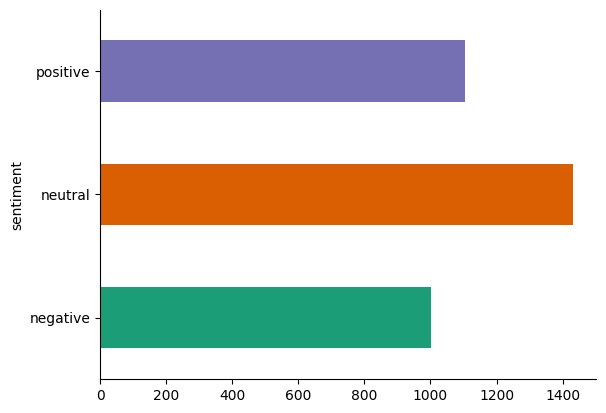

In [67]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_test.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [68]:
df_train.describe()


,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [69]:
df_test.describe()


,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


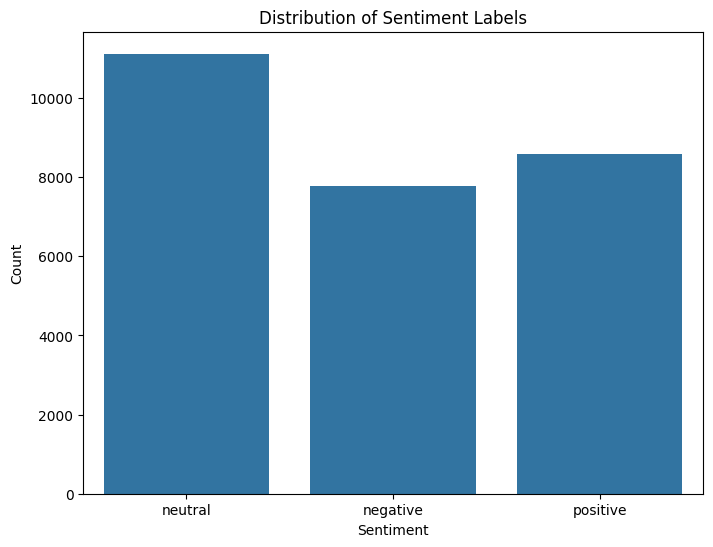

In [70]:
# 1. Distribution of Sentiment Labels
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df_train)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

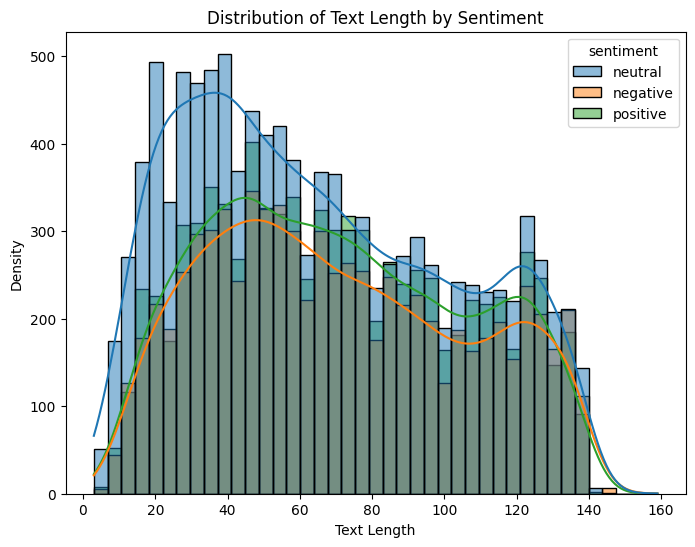

In [71]:
# 2. Text Length Analysis
df_train['text_length'] = df_train['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='text_length', hue='sentiment', kde=True)
plt.title('Distribution of Text Length by Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()


In [72]:
# 3. Word Frequency Analysis
from collections import Counter

# Concatenate all texts after converting NaN values to empty strings
text_concatenated = " ".join(df_train["text"].fillna('').astype(str))

# Perform word frequency analysis
word_freq = Counter(text_concatenated.split())

# Create a DataFrame to store word frequencies
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Display the top words by frequency
print(word_freq_df.head())


    Word  Frequency
78    to       9809
4      I       8802
35   the       8388
137    a       6501
16    my       4932


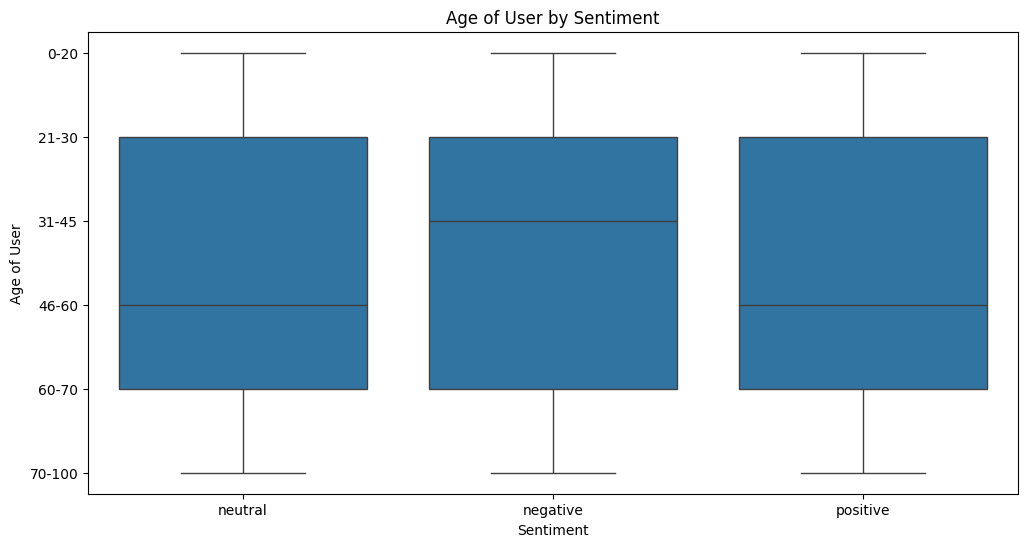

In [73]:
# 4. Metadata Features Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='sentiment', y='Age of User')
plt.title('Age of User by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Age of User')
plt.show()

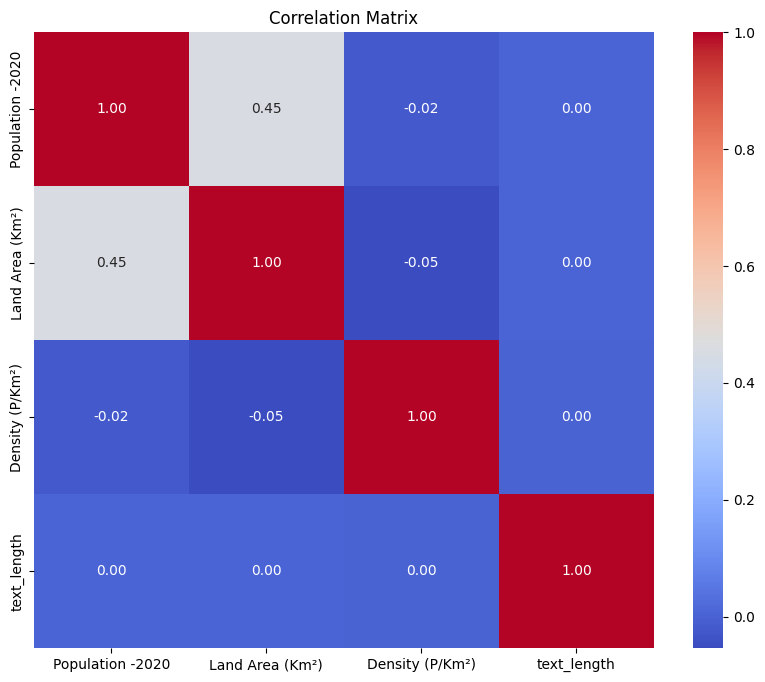

In [74]:
# 5. Correlation Analysis
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_train[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [75]:
# 6. Visualization of Text Data (Word Cloud)
from wordcloud import WordCloud

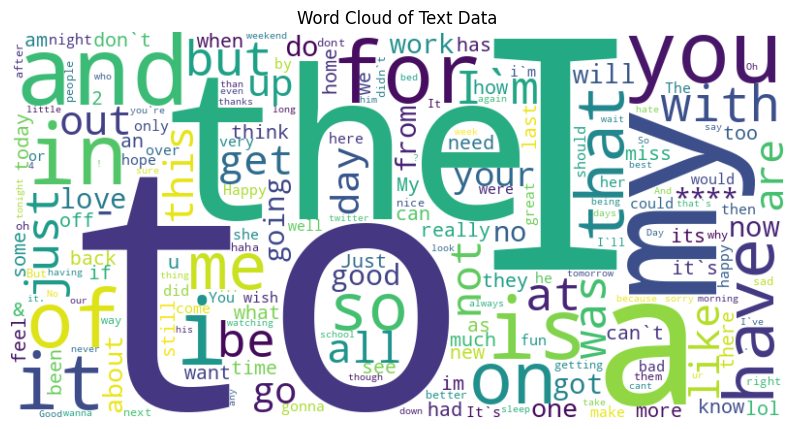

In [76]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


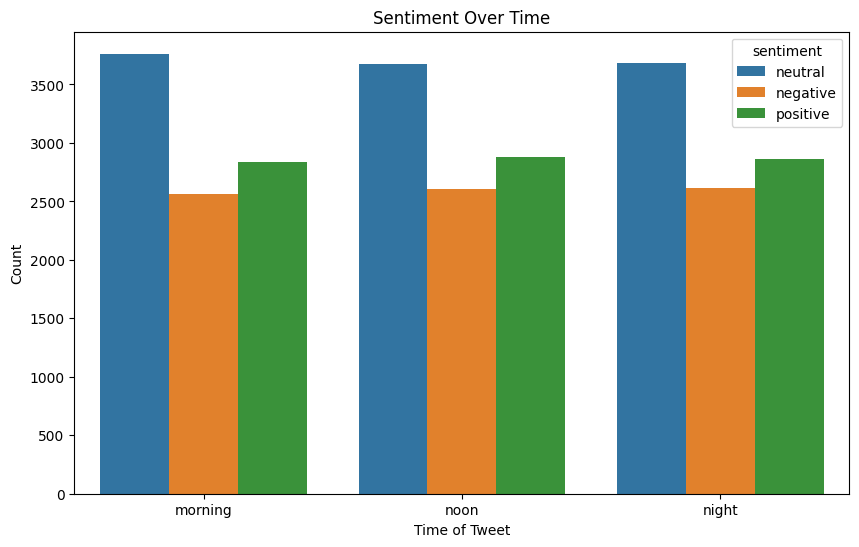

In [77]:
# 7. Sentiment Over Time
plt.figure(figsize=(10, 6))
sns.countplot(x='Time of Tweet', hue='sentiment', data=df_train)
plt.title('Sentiment Over Time')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.show()

In [78]:
# Check for missing values in train dataset
missing_train = df_train.isnull().sum()
print("Missing values in train dataset:")
print(missing_train)

# Check for missing values in test dataset
missing_test = df_test.isnull().sum()
print("\nMissing values in test dataset:")
print(missing_test)


Missing values in train dataset:
textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
text_length         0
dtype: int64

Missing values in test dataset:
textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


In [79]:
df_train.dropna(subset=['text', 'selected_text'], inplace=True)

In [80]:
# Check for missing values in train dataset
missing_train = df_train.isnull().sum()
print("Missing values in train dataset:")
print(missing_train)

# Check for missing values in test dataset
missing_test = df_test.isnull().sum()
print("\nMissing values in test dataset:")
print(missing_test)


Missing values in train dataset:
textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
text_length         0
dtype: int64

Missing values in test dataset:
textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


In [81]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [82]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    filtered_text = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(filtered_text)

df_train['clean_text'] = df_train['text'].apply(clean_text)
df_train['clean_selected_text'] = df_train['selected_text'].apply(clean_text)

df_test['clean_text'] = df_test['text'].apply(clean_text)


In [83]:
df_train['clean_text'] = df_train['clean_text'].str.lower()
df_train['clean_selected_text'] = df_train['clean_selected_text'].str.lower()


In [84]:
from nltk.tokenize import word_tokenize

df_train['tokens_text'] = df_train['clean_text'].apply(word_tokenize)
df_train['tokens_selected_text'] = df_train['clean_selected_text'].apply(word_tokenize)


In [85]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df_train['tokens_text'] = df_train['tokens_text'].apply(lambda x: [word for word in x if word not in stop_words])
df_train['tokens_selected_text'] = df_train['tokens_selected_text'].apply(lambda x: [word for word in x if word not in stop_words])


In [86]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df_train['lemmatized_text'] = df_train['tokens_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_train['lemmatized_selected_text'] = df_train['tokens_selected_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [87]:
df_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),text_length,clean_text,clean_selected_text,tokens_text,tokens_selected_text,lemmatized_text,lemmatized_selected_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,36,id responded going,id responded going,"[id, responded, going]","[id, responded, going]","[id, responded, going]","[id, responded, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,46,sooo sad miss san diego,sooo sad,"[sooo, sad, miss, san, diego]","[sooo, sad]","[sooo, sad, miss, san, diego]","[sooo, sad]"
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,25,boss bullying,bullying,"[boss, bullying]",[bullying],"[bos, bullying]",[bullying]
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,31,interview leave alone,leave alone,"[interview, leave, alone]","[leave, alone]","[interview, leave, alone]","[leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,75,sons couldnt put releases already bought,sons,"[sons, couldnt, put, releases, already, bought]",[sons],"[son, couldnt, put, release, already, bought]",[son]


In [88]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2


# Define the target variable y_train
y_train = df_train['sentiment']

# Drop the target variable from the train dataset to get X_train
X_train = df_train.drop(columns=['sentiment'])

# Drop irrelevant columns from the test dataset to get X_test
X_test = df_test.drop(columns=['textID'])

# Perform feature generation and selection
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train['text'])
X_test_tfidf = tfidf.transform(X_test['text'])

selector = SelectKBest(chi2, k=2000)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_test_selected = selector.transform(X_test_tfidf)

# Split the train dataset into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)


Shape of X_train_tfidf: (27480, 5000)
Shape of X_test_tfidf: (3534, 5000)
Shape of X_train_selected: (27480, 2000)
Shape of X_test_selected: (3534, 2000)


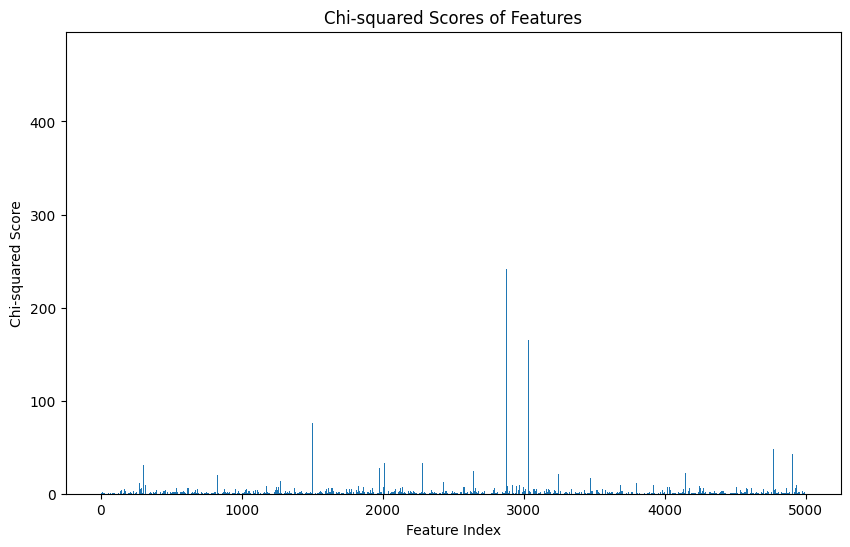

In [89]:
# Print the shape of the transformed TF-IDF matrices
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

# Print the shape of the selected feature matrices
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

# Visualize the selected features (optional)
import matplotlib.pyplot as plt

# Plot the scores of the features obtained from chi-squared test
plt.figure(figsize=(10, 6))
plt.bar(range(len(selector.scores_)), selector.scores_)
plt.xlabel('Feature Index')
plt.ylabel('Chi-squared Score')
plt.title('Chi-squared Scores of Features')
plt.show()


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Drop rows with missing values
df_train.dropna(subset=['text', 'selected_text'], inplace=True)
df_test.dropna(inplace=True)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

# Target variable
y_train = df_train['sentiment']

# Chi-squared Feature Selection
selector = SelectKBest(chi2, k=2000)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train-validation split
X_train_selected, X_val_selected, y_train, y_val = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_selected, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, model.predict(X_train_selected))
val_accuracy = accuracy_score(y_val, model.predict(X_val_selected))

print("Training accuracy:", train_accuracy)
print("Validation accuracy:", val_accuracy)


Training accuracy: 0.7505003639010189
Validation accuracy: 0.7054221251819505


In [91]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Drop rows with NaN values
df_train.dropna(subset=['text'], inplace=True)


# Ensure 'sentiment' column is of type str
df_train['sentiment'] = df_train['sentiment'].astype(str)

# Combine 'text' and 'sentiment' columns for feature extraction
X_text = df_train['text'] + ' ' + df_train['sentiment']
y = df_train['sentiment']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Train the model with adjusted hyperparameters
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf_model.fit(X_train_vec, y_train)

# Make predictions on the validation set
y_pred = rf_model.predict(X_val_vec)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 1.0


In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
report = classification_report(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1572
     neutral       1.00      1.00      1.00      2236
    positive       1.00      1.00      1.00      1688

    accuracy                           1.00      5496
   macro avg       1.00      1.00      1.00      5496
weighted avg       1.00      1.00      1.00      5496



In [93]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Make predictions on the validation set
y_pred_train = model.predict(X_train_selected)
y_pred_val = model.predict(X_val_selected)

# Calculate precision, recall, and F1 score for training and validation sets
precision_train = precision_score(y_train, y_pred_train, average='weighted')
precision_val = precision_score(y_val, y_pred_val, average='weighted')

recall_train = recall_score(y_train, y_pred_train, average='weighted')
recall_val = recall_score(y_val, y_pred_val, average='weighted')

f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_val = f1_score(y_val, y_pred_val, average='weighted')

# Print performance metrics
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

print("\nTraining Precision:", precision_train)
print("Validation Precision:", precision_val)

print("\nTraining Recall:", recall_train)
print("Validation Recall:", recall_val)

print("\nTraining F1 Score:", f1_train)
print("Validation F1 Score:", f1_val)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_val))


Training Accuracy: 0.7505003639010189
Validation Accuracy: 0.7054221251819505

Training Precision: 0.7610952359212398
Validation Precision: 0.716855387187244

Training Recall: 0.7505003639010189
Validation Recall: 0.7054221251819505

Training F1 Score: 0.7505383291717864
Validation F1 Score: 0.7046549509837546

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.58      0.66      1572
     neutral       0.64      0.78      0.70      2236
    positive       0.79      0.72      0.75      1688

    accuracy                           0.71      5496
   macro avg       0.73      0.69      0.70      5496
weighted avg       0.72      0.71      0.70      5496



In [102]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
X_test = vectorizer.transform(df_test['text'])

# Perform feature selection if necessary
X_test_selected = selector.transform(X_test)  # If you used feature selection in training

# Make predictions using the trained model
y_pred_test = model.predict(X_test_selected)

# Optionally, if you want to save the predictions to a file
predictions_df = pd.DataFrame({'textID': df_test['textID'], 'predicted_sentiment': y_pred_test})
predictions_df.to_csv("predictions.csv", index=False)


In [103]:
df_predictions = pd.read_csv("predictions.csv", encoding='latin1')


In [104]:
df_predictions.head()

,textID,predicted_sentiment
0,f87dea47db,neutral
1,96d74cb729,neutral
2,eee518ae67,positive
3,01082688c6,positive
4,33987a8ee5,positive


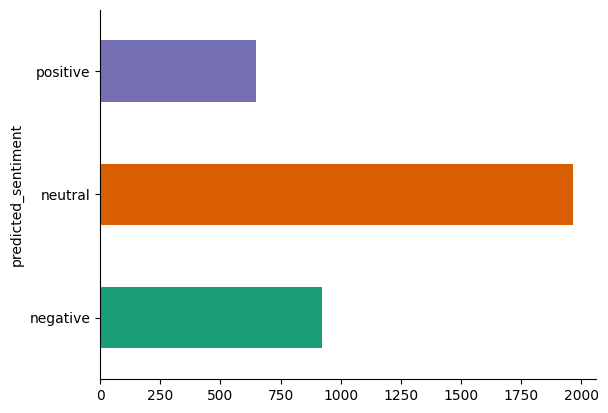

In [105]:
# @title predicted_sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_predictions.groupby('predicted_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)